# llm_perf dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/aggregated_llm_perf.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             1692 non-null   object 
 1   parameters_count  1692 non-null   float64
 2   gpu               1692 non-null   object 
 3   energy_per_token  1692 non-null   float64
dtypes: float64(2), object(2)
memory usage: 53.0+ KB
None


In [3]:
print(df.describe())

       parameters_count  energy_per_token
count       1692.000000       1692.000000
mean           6.614750          0.002608
std            9.893855          0.002597
min            0.001000          0.000062
25%            0.460000          0.000982
50%            4.000000          0.001950
75%            7.000000          0.003242
max           70.000000          0.022200


In [4]:
from IPython.display import display
display(df)

,model,parameters_count,gpu,energy_per_token
0,EleutherAI/gpt-neox-20b,20.00,NVIDIA A100-SXM4-80GB,0.003270
1,EleutherAI/pythia-6.9b-deduped,6.90,NVIDIA A100-SXM4-80GB,0.001790
2,EleutherAI/pythia-6.7b,6.70,NVIDIA A100-SXM4-80GB,0.001830
3,EleutherAI/pythia-1.4b-deduped,1.40,NVIDIA A100-SXM4-80GB,0.001210
4,EleutherAI/gpt-j-6b,6.00,NVIDIA A100-SXM4-80GB,0.002300
...,...,...,...,...
1687,rinna/bilingual-gpt-neox-4b,4.00,NVIDIA GeForce RTX 4090,0.001450
1688,01-ai/Yi-6B,6.00,NVIDIA GeForce RTX 4090,0.002190
1689,bigscience/bloom-3b,3.00,NVIDIA GeForce RTX 4090,0.001130
1690,togethercomputer/RedPajama-INCITE-Base-3B-v1,3.00,NVIDIA GeForce RTX 4090,0.001130


# Analyse de parameters_count 

In [5]:
parameters_count_column = df['parameters_count']

entity_counts = parameters_count_column.value_counts()

print("Nombre total d'entités uniques :", len(entity_counts))
print("\nNombre de chaque entité :")
print(entity_counts)

Nombre total d'entités uniques : 57

Nombre de chaque entité :
parameters_count
7.000     333
3.000     122
13.000    100
0.031      96
6.000      86
1.300      66
4.000      60
1.100      60
1.000      56
2.700      41
6.700      34
0.160      32
0.410      31
34.000     29
0.101      25
10.700     24
12.000     24
0.248      22
20.000     22
22.000     20
2.800      16
0.070      16
1.400      16
0.033      15
0.081      15
0.220      15
0.028      15
0.125      15
0.008      15
0.003      14
0.460      14
6.900      14
11.000     13
10.000     12
0.001      11
12.800     11
65.000     11
4.500      11
0.345      10
8.000      10
0.564      10
0.111      10
16.000     10
0.400      10
26.000     10
30.000      9
0.356       9
0.126       9
7.500       8
40.000      8
0.256       8
14.000      8
67.000      7
0.136       7
0.430       6
0.169       6
70.000      5
Name: count, dtype: int64


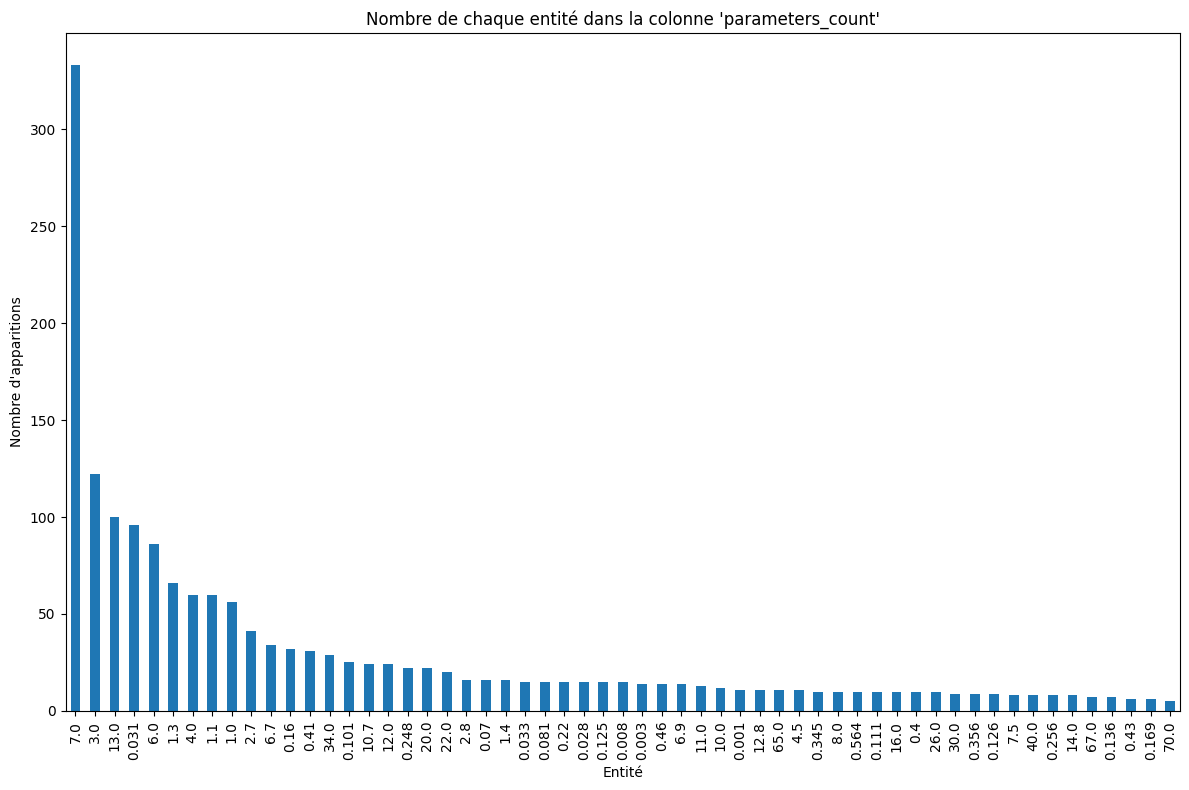

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

entity_counts.plot(kind='bar')

plt.title("Nombre de chaque entité dans la colonne 'parameters_count'")
plt.xlabel('Entité')
plt.ylabel('Nombre d\'apparitions')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Analyse de model

In [78]:
print(df['model'].tolist())

['EleutherAI/gpt-neox-20b', 'EleutherAI/pythia-6.9b-deduped', 'EleutherAI/pythia-6.7b', 'EleutherAI/pythia-1.4b-deduped', 'EleutherAI/gpt-j-6b', 'EleutherAI/pythia-12b', 'EleutherAI/pythia-1.3b', 'EleutherAI/pythia-12b-deduped', 'EleutherAI/pythia-1b-deduped', 'EleutherAI/gpt-neo-125m', 'EleutherAI/polyglot-ko-12.8b', 'EleutherAI/pythia-410m', 'EleutherAI/gpt-neo-1.3B', 'EleutherAI/pythia-160m-deduped', 'EleutherAI/pythia-410m-deduped', 'EleutherAI/pythia-160m', 'EleutherAI/pythia-2.7b', 'EleutherAI/pythia-2.8b-deduped', 'EleutherAI/pythia-70m-deduped', 'EleutherAI/gpt-neo-2.7B', 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T', 'ahxt/llama2_xs_460M_experimental', 'GeneZC/MiniMA-3B', 'GeneZC/MiniMA-2-3B', 'Locutusque/TinyMistral-248m', 'DevaMalla/llama-base-7b', 'pszemraj/pythia-31m-simplepile-lite-2048-scratch-2e', 'pszemraj/pythia-31m-goodwiki-deduped-2048-scratch', 'pszemraj/pythia-31m-simplewiki-2048', 'pszemraj/pythia-31m-KI_v1-2048-scratch', 'pszemraj/pythia-31m-simplewiki-s

In [91]:
import pandas as pd
from IPython.display import display


def create_dataframe_from_txt(file_path):
    with open(file_path, 'r') as file:
        data = file.read().splitlines()
        data = [line.split(':') for line in data if len(line.split(':')) >= 2]

    llm_data = {'nom du llm': [], 'nombre paramètre': []}
    for line in data:
        llm_name = line[0].strip()
        param_count = line[1].strip().split()[0]
        llm_data['nom du llm'].append(llm_name)
        llm_data['nombre paramètre'].append(param_count)
    df = pd.DataFrame(llm_data)

    return df


# Exemple d'utilisation
file_path = 'data/model_parametres.txt'
df_model_parametre = create_dataframe_from_txt(file_path)

display(df_model_parametre)

,nom du llm,nombre paramètre
0,EleutherAI/gpt-neox-20b,20
1,EleutherAI/pythia-6.9b-deduped,6.9
2,EleutherAI/pythia-6.7b,6.7
3,EleutherAI/pythia-1.4b-deduped,1.4
4,EleutherAI/gpt-j-6b,6
...,...,...
1655,rinna/bilingual-gpt-neox-4b,4
1656,01-ai/Yi-6B,6
1657,bigscience/bloom-3b,3
1658,togethercomputer/RedPajama-INCITE-Base-3B-v1,3


In [85]:
import pandas as pd


def trouver_entites_manquantes(df1, df2):
    entites_manquantes = []
    for model in df1['model']:
        if model not in set(df2['nom du llm']):
            entites_manquantes.append(model)
    return entites_manquantes

df1 = df
df2 = df_model_parametre

entites_manquantes = trouver_entites_manquantes(df1, df2)

print("Entités présentes dans la colonne 'model' mais absentes dans la colonne 'nom du llm':")
print(entites_manquantes)

Entités présentes dans la colonne 'model' mais absentes dans la colonne 'nom du llm':
[]


In [86]:
def verifier_enchainement_elements(df1, df2):
    enchainement_identique = True
    for index, row in df1.iterrows():
        model = row['model']
        if index < len(df2) and model != df2.loc[index, 'nom du llm']:
            enchainement_identique = False
            break
    return enchainement_identique


# Utilisation de la fonction pour vérifier l'enchaînement des éléments
enchainement_identique = verifier_enchainement_elements(df, df_model_parametre)

if enchainement_identique:
    print("Les éléments dans la colonne 'model' ont le même enchaînement que les éléments dans la colonne 'nom du llm'.")
else:
    print("Les éléments dans la colonne 'model' n'ont pas le même enchaînement que les éléments dans la colonne 'nom du llm'.")

Les éléments dans la colonne 'model' n'ont pas le même enchaînement que les éléments dans la colonne 'nom du llm'.


In [88]:
def trouver_indices_elements_differents(df1, df2):
    indices_elements_differents = []
    for index, row in df1.iterrows():
        model = row['model']
        if index < len(df2) and model != df2.loc[index, 'nom du llm']:
            indices_elements_differents.append(index)
    return indices_elements_differents


# Utilisation de la fonction pour trouver les indices des éléments différents
indices_elements_differents = trouver_indices_elements_differents(df1, df2)

if indices_elements_differents:
    print("Les éléments suivants diffèrent entre la colonne 'model' et la colonne 'nom du llm' aux indices suivants :")
    print(indices_elements_differents)
else:
    print("Tous les éléments dans la colonne 'model' ont le même enchaînement que les éléments dans la colonne 'nom du llm'.")

Les éléments suivants diffèrent entre la colonne 'model' et la colonne 'nom du llm' aux indices suivants :
[1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536